# RUN PERFORMANCE PROJECT - Pau Sampietro

## Introductory application of unsupervised learning algorithms (Clustering moves)

_EXPLANATION_

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.plotly as py
import matplotlib.pyplot as plt
import cufflinks as cf 
from ipywidgets import interact
import plotly.graph_objs as go
from rpdb import read_table, read_table_sql, export_table

#### Importing data from tables stored in the DB

To work on this part, we only import the relevant and not redundant columns of the records table. (waiting time: ~ 3 min)

In [2]:
Ssql = """SELECT idmove, idrecord, enhanced_altitude, vertical_speed, records.heart_rate, records.pace, athlete
         FROM records
         INNER JOIN moves ON move = idmove"""

# Function created for this purpose, that imports data with specific select query 
records = read_table_sql('records', Ssql)

In [3]:
records.head()

,idmove,idrecord,enhanced_altitude,vertical_speed,heart_rate,pace,athlete
0,1,6,133.0,0.0,110.0,7.94,P
1,1,7,133.0,0.0,110.0,7.94,P
2,1,8,133.0,0.0,110.0,6.67,P
3,1,9,134.0,0.0,110.0,6.67,P
4,1,10,134.0,0.0,110.0,6.41,P


### 1. Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. heart rate compared to pace and vertical_speed). Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through **feature scaling**. We'll use this technique again with this dataset.

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
records_feat = records[['enhanced_altitude', 'vertical_speed', 'heart_rate', 'pace']]
records_sc = scaler.fit_transform(records_feat)

In [6]:
pd.DataFrame(records_sc).head()

,0,1,2,3
0,-0.132485,0.009598,-3.10866,0.347513
1,-0.132485,0.009598,-3.10866,0.347513
2,-0.132485,0.009598,-3.10866,0.070669
3,-0.130626,0.009598,-3.10866,0.070669
4,-0.130626,0.009598,-3.10866,0.013993


### 2. Data Clustering with K-Means algorithm

In [7]:
from sklearn.cluster import KMeans

In [8]:
# Instantiate the model and fit records features once they have been scaled
km_model = KMeans(n_clusters=4)
km_fit = km_model.fit(X=records_sc)

# We add a column with the labels provided by the algorithm
records['kmeans_cluster'] = km_model.labels_

In [9]:
records['kmeans_cluster'].value_counts()

2    2469203
0     269113
3     157395
1      35371
Name: kmeans_cluster, dtype: int64

### 3. Data Clustering with DBSCAN algorithm

In [13]:
from sklearn.cluster import DBSCAN

In [ ]:
# Instantiate the model and fit records features once they have been scaled
dbscan_model = DBSCAN(eps=0.5, min_samples=6)
dbscan_model.fit(records_sc)

# We add a column with the labels provided by the algorithm
pref_df['dbscan_cluster'] = dbscan_model.labels_

In [ ]:
records['dbscan_cluster'].value_counts()

### 4. Visualization of Clusters and performing some Metrics

#### 4.1. Metrics for raw clustering with both models

In [10]:
from sklearn.metrics import silhouette_score

In [12]:
km_sc = silhouette_score(records_sc,labels=records['kmeans_cluster'])
#db_sc = silhouette_score(records,labels=records['dbscan_cluster'])

print(f'Score for K-Means Clustering: Silouhette score = {km_sc}')
#print(f'Score for DBSCAN Clustering: Silouhette score = {db_sc}')

KeyboardInterrupt: 

#### 4.2. Visualization in scatter plots of clusters done with both algorithms

# HERE WE HAVE TO DO SUBPLOTS WITH BOTH SCATTERPLORS: KMEANS AND DBSCAN. CHOOSE/TEST VARIABLES X and Y!!!

In [14]:
sample = records.sample(10000)

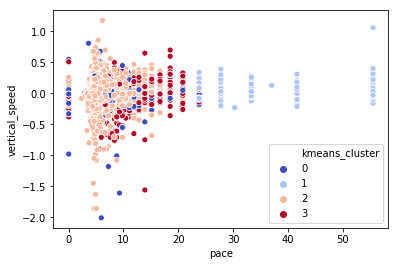

In [15]:
sns.scatterplot(x='pace',y='vertical_speed',data=sample ,hue='kmeans_cluster',palette="coolwarm")

# 3D scatter to see clusters!!!!

In [16]:
from mpl_toolkits.mplot3d import Axes3D

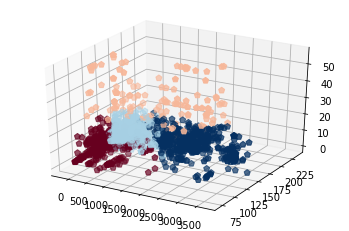

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(sample.pace)
y = np.array(sample.heart_rate)
z = np.array(sample.enhanced_altitude)

ax.scatter(z,y,x, marker="p", c=sample.kmeans_cluster, s=40, cmap="RdBu")

plt.show()